In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

In [5]:
models = {
    "gpt-3.5-turbo":"gpt-3.5-turbo",
    "gpt-4o":"gpt-4o",
    "gpt-4o-mini":"gpt-4o-mini"
}

In [6]:
messages =[
    SystemMessage(content="You are a helpfull assistant"),
    HumanMessage(content="Example about software quality audit")
]

In [9]:
import time
def benchmark_model(model,message, num_requests =7):
    chat =ChatOpenAI(model = model)
    response_times =[]
    for i in range(num_requests):
        start_time = time.perf_counter()
        chat.invoke(message)
        end_time = time.perf_counter()
        response_time = end_time - start_time
        response_times.append(response_time)
        print(f"Model:{model},Iteration:{i+1},Time:{response_times[-1]:.4f} seconds")
        return response_times

In [20]:
benchmark_data = {}
for model_name, model_id in models.items():
    print(f'Benchmarking model:{model_name}')
    response_times = benchmark_model(model_id,messages)
    print(response_times)
    benchmark_data[model_name] = response_times

benchmark_data


Benchmarking model:gpt-3.5-turbo
Model:gpt-3.5-turbo,Iteration:1,Time:2.0375 seconds
[2.037528699991526]
Benchmarking model:gpt-4o
Model:gpt-4o,Iteration:1,Time:10.5647 seconds
[10.564667200000258]
Benchmarking model:gpt-4o-mini
Model:gpt-4o-mini,Iteration:1,Time:9.2835 seconds
[9.283514100010507]


{'gpt-3.5-turbo': [2.037528699991526],
 'gpt-4o': [10.564667200000258],
 'gpt-4o-mini': [9.283514100010507]}

In [21]:
import numpy as np
stats = {}
for model_name, response_times in benchmark_data.items():
    stats[model_name] = {
        'mean': np.mean(response_times),       
        'min': np.min(response_times),
        'max': np.max(response_times)
    }

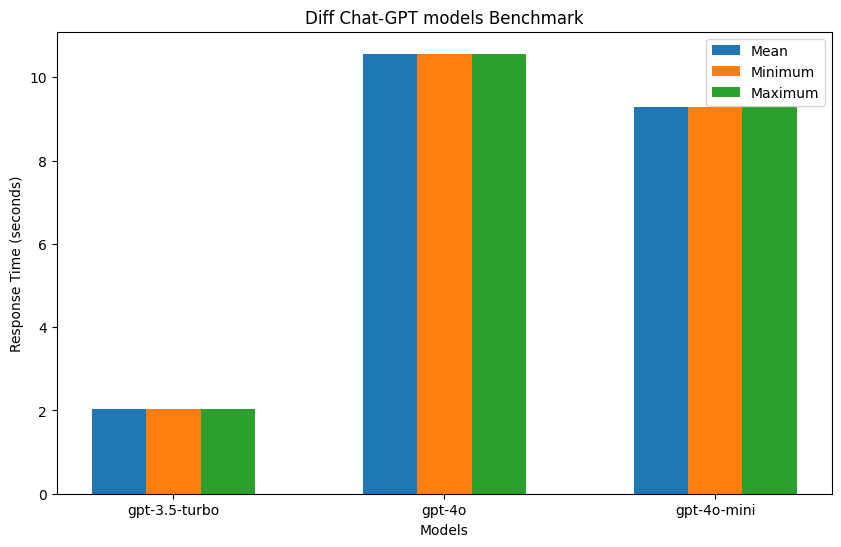

In [22]:
import pandas as pd
stats_df = pd.DataFrame(stats).T
plt.figure(figsize=(10, 6))
x=np.arange(len(models))
width=0.2

plt.bar(x - width,stats_df["mean"],width,label="Mean")
plt.bar(x, stats_df["min"], width, label="Minimum")
plt.bar(x + width, stats_df["max"], width, label="Maximum")

plt.xlabel("Models")
plt.ylabel("Response Time (seconds)")   
plt.title("Diff Chat-GPT models Benchmark")
plt.xticks(x, models.keys())
plt.legend()

plt.savefig("gpt_models_benchmarks.png")
plt.show()